In [1]:
from vis.losses import ActivationMaximization
from vis.regularizers import TotalVariation, LPNorm
from vis.optimizer import Optimizer
from keras.models import load_model

Using TensorFlow backend.


In [ ]:
model = load_model("best_epoch_res-24.h5")
print('Model loaded.')

In [3]:
from keras import activations
from vis.utils import utils
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_1')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

In [ ]:
model.summary()

C:\Users\bibek\Anaconda3\envs\env1\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\bibek\Anaconda3\envs\env1\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


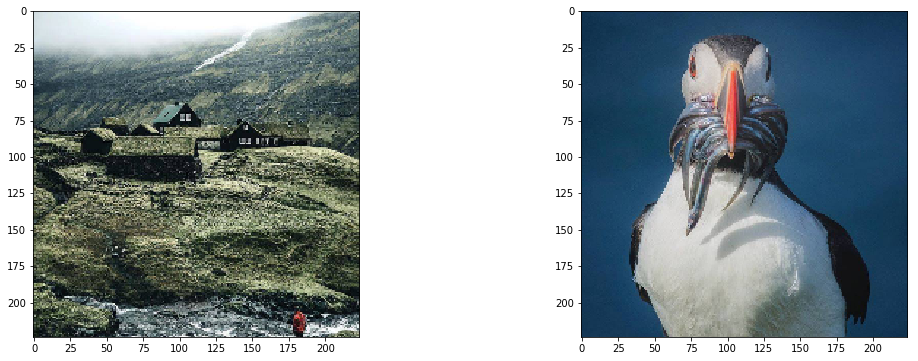

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('images/airpixels3.jpg', target_size=(224, 224))
img2 = utils.load_img('images/danielkordon-3.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [6]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam, overlay
from PIL import Image

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


<Figure size 1296x432 with 0 Axes>

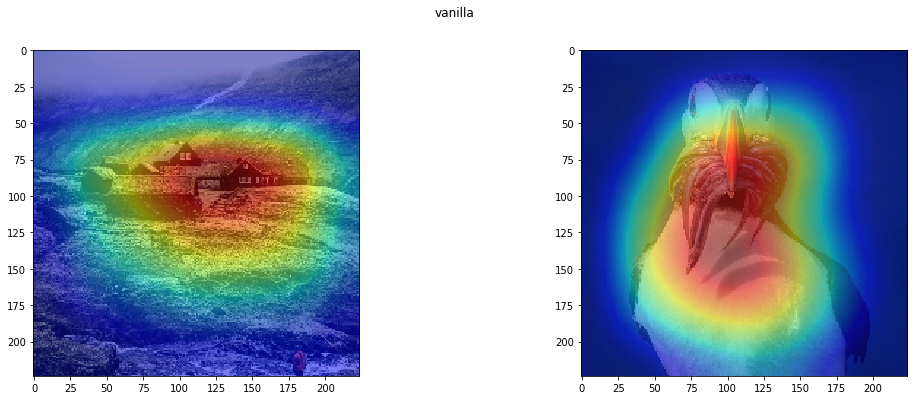

<Figure size 1296x432 with 0 Axes>

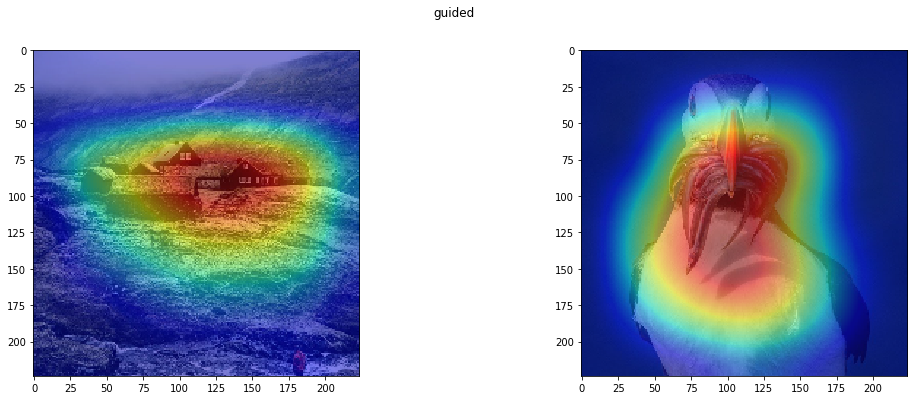

In [7]:
penultimate_layer = utils.find_layer_idx(model, 'res5c_branch2c')

for modifier in [None, 'guided']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    title = "vanilla" if modifier is None else modifier
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=[7*i], 
                              seed_input=img, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        print(jet_heatmap.shape)
        ax[i].imshow(overlay(jet_heatmap, img))
        output = overlay(jet_heatmap, img)
        output_im = Image.fromarray(output)
        output_im.save("images/results/extra_{0}-{1}.jpg".format(title,7*i))